# Customer Segmentation using Clustering

<p align="center">
  <img width="750" height="300" src="https://blog.intercomassets.com/blog/wp-content/uploads/2020/10/Customer-segmentation-performance-matrix.png">
</p>

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Dataset_Features


**Customer Information:**

- `ID`: Unique identifier for the customer
- `Year_Birth`: Year of the customer's birth
- `Education`: Level of education attained by the customer
- `Marital_Status`: Marital status of the customer
- `Income`: Yearly household income of the customer
- `Kidhome`: Number of children in the customer's household
- `Teenhome`: Number of teenagers in the customer's household
- `Dt_Customer`: Date when the customer enrolled with the company
- `Recency`: Number of days since the customer's last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Product Expenditure:**

- `MntWines`: Amount spent on wine in the last 2 years
- `MntFruits`: Amount spent on fruits in the last 2 years
- `MntMeatProducts`: Amount spent on meat in the last 2 years
- `MntFishProducts`: Amount spent on fish in the last 2 years
- `MntSweetProducts`: Amount spent on sweets in the last 2 years
- `MntGoldProds`: Amount spent on gold in the last 2 years

**Promotional Response:**

- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Purchase Channels:**

- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to the company’s website in the last month


In [1]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt


# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('/content/marketing_campaign.csv', sep="\t")


## Handling Missing Values


let's find if we have missing values in the dataset.

In [3]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

let's find if we have duplicate rows.

In [6]:
data.duplicated().sum()

0


## Feature Engineering
These steps are demonstration pupose only learners can decide on their own ways for feature engineeering

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

In [8]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [9]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-12-06 00:00:00
The oldest customer's enrolment date in the records: 2012-01-08 00:00:00


Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [10]:
data['Age'] = 2015 - data['Year_Birth']

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [11]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [12]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [13]:
data['Children'] = data['Kidhome'] + data['Teenhome']

To get further clarity of household, Creating feature indicating "Family_Size"

In [14]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

Create a feature "Is_Parent" to indicate parenthood status

In [15]:
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

Segmenting education levels in three groups

In [16]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

Dropping some of the redundant features

In [17]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [18]:
data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,Partner,0,2,0


## Data_Analysis_and_Visualization

These steps are demonstration pupose only learners can decide on their own ways for which features needed to be analyzed

In [19]:
data.shape

(2216, 29)

There are 2216 cutomers and 29 features in the dataset.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [21]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,46.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,122.000000,2525.000000,3.000000,5.000000,1.000000


This code is using the describe method on a DataFrame, and it specifies include=object to focus on summary statistics for columns with object (string) data types. The .T at the end transposes the result for better readability.

In [22]:
data.describe(include=object).T

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


.

### Pairplot Visualization

The resulting pairplot will display scatterplots for each pair of variables specified in `vars`, with points colored based on the number of children ('Children' variable). This visualization is helpful for gaining insights into the relationships and distributions between the selected variables and understanding how they might be influenced by the number of children in the household.


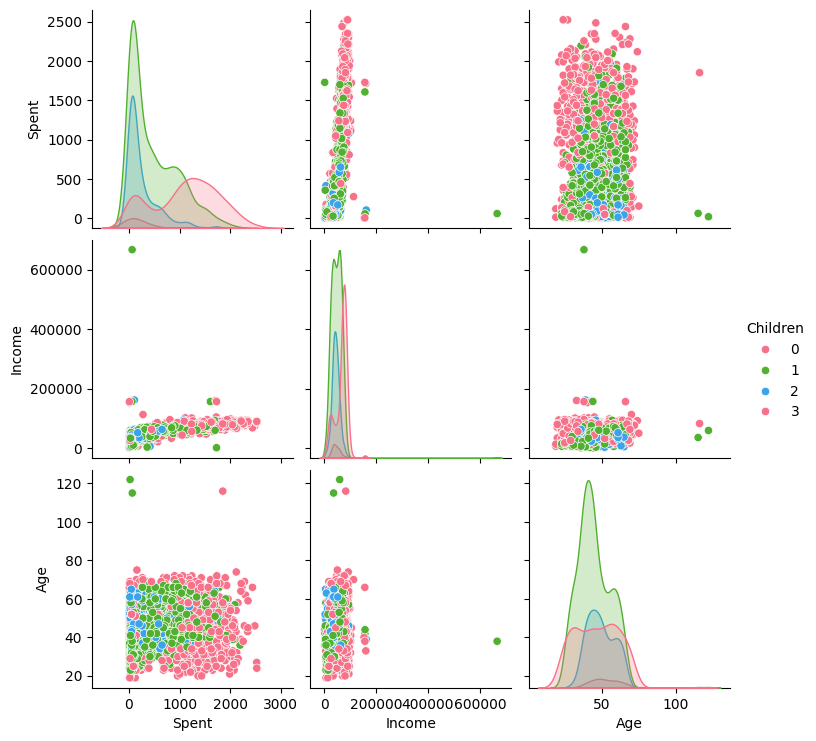

In [23]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

This scatter plot visualizes the relationship between the amount spent (Spent) and the income (Income) of individuals with an income less than 600,000. The plot aims to provide insights into potential patterns or trends in spending behavior relative to income in the specified income range.

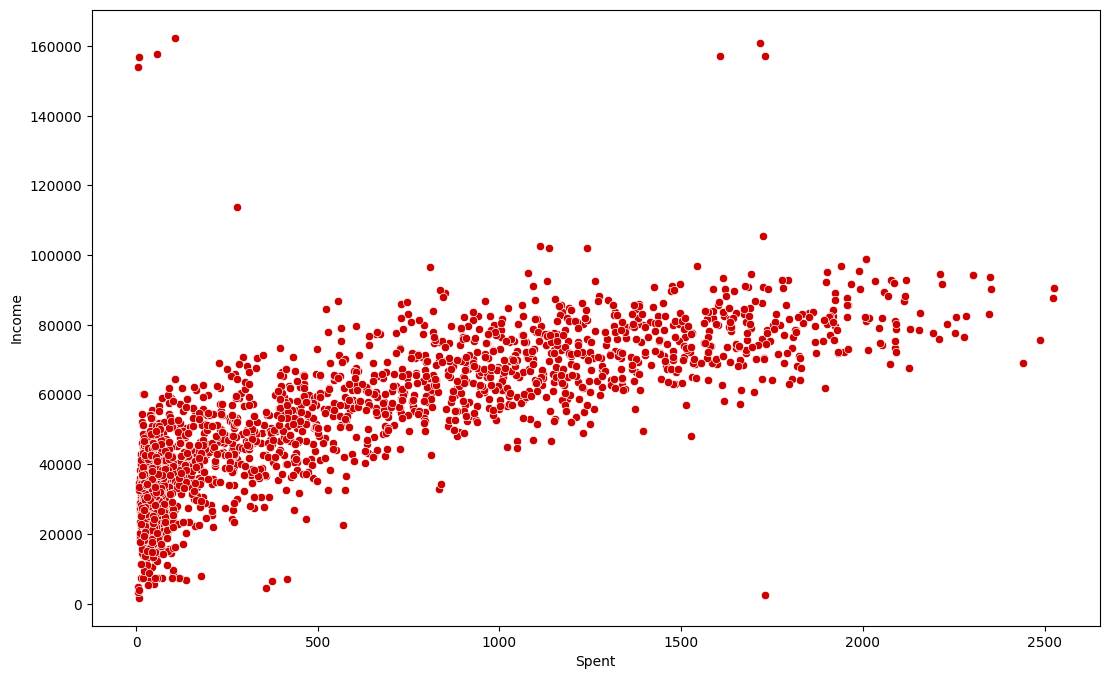

In [24]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

The scatter plot is a useful visualization for exploring the correlation or patterns between two continuous variables. In this case, it allows an examination of how the amount spent varies with age. Points on the plot represent individual data points, and the overall pattern or trend can provide insights into potential relationships between spending and age.

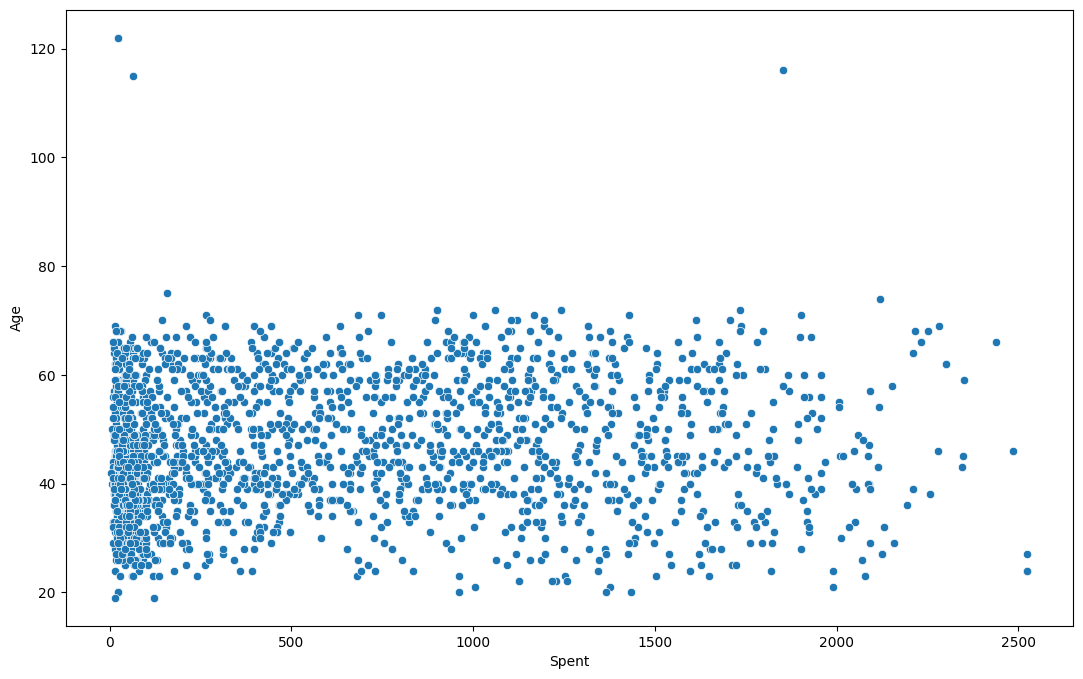

In [25]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);

This type of visualization can provide insights into the spending patterns of different education groups, helping to identify any notable trends or variations.

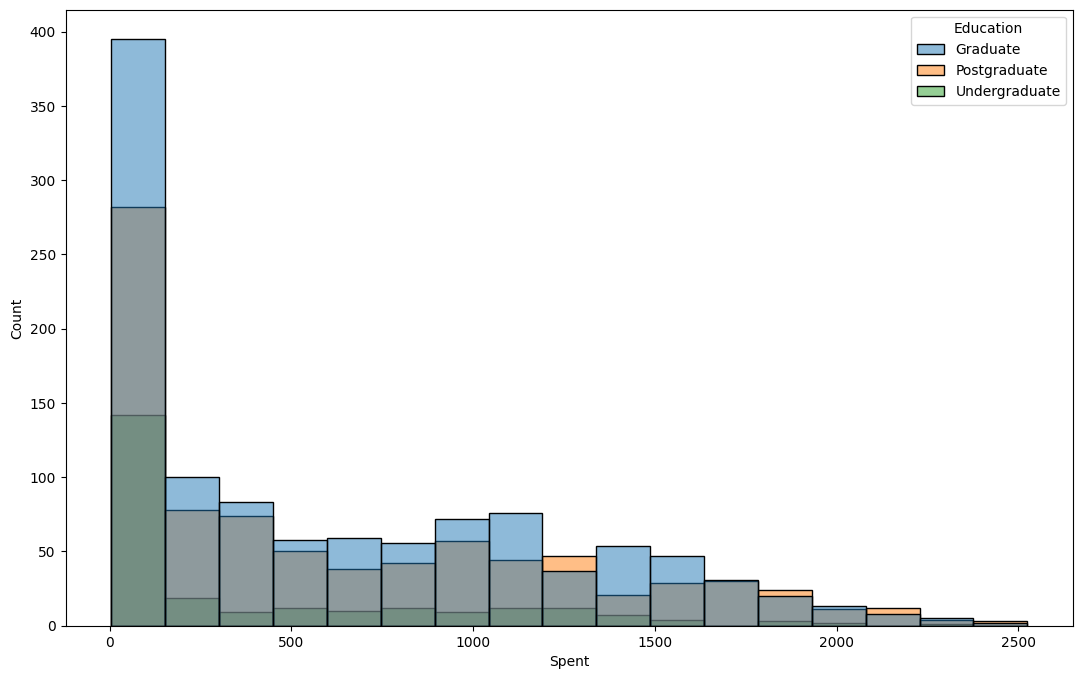

In [26]:
plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);

Now let us generate a pie chart to visualize the distribution of education levels in the 'Education' column of the 'data' DataFrame.

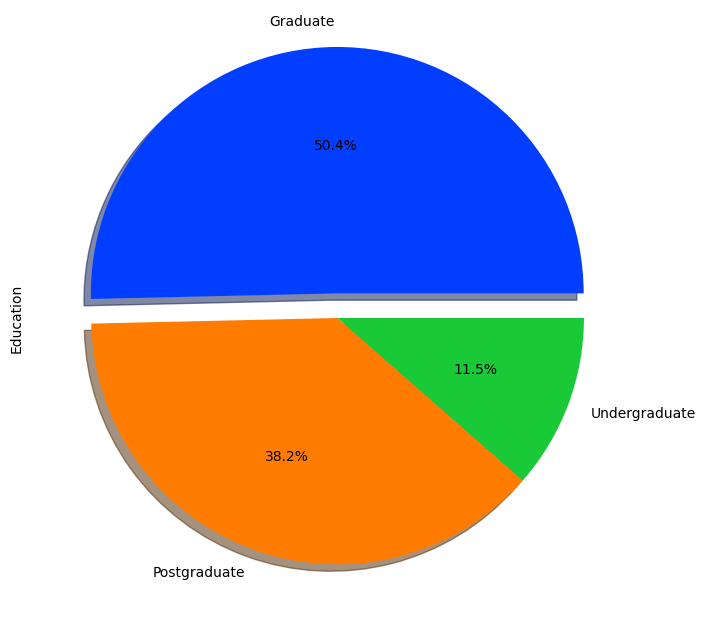

In [27]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));

## Check_for_Rare_Categories



Some categories may appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

* Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
* Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.
* Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

In [28]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [29]:
# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / np.float(len(data)))
    print()
    print()

Graduate         0.503610
Postgraduate     0.381769
Undergraduate    0.114621
Name: Education, dtype: float64


Partner    0.645307
Alone      0.354693
Name: Living_With, dtype: float64




As shown above, there is no rare category in the categorical variables.

## Categorical_Variables_Encoding



In [30]:
categorical

['Education', 'Living_With']

In [31]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

Since the education is a ordinal variable, we will encode it with ordinal numbers.

In [32]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [33]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})

In [34]:
data.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int64
dtype: object

In [35]:
data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,61,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,50,776,1,0,2,0


<Axes: >

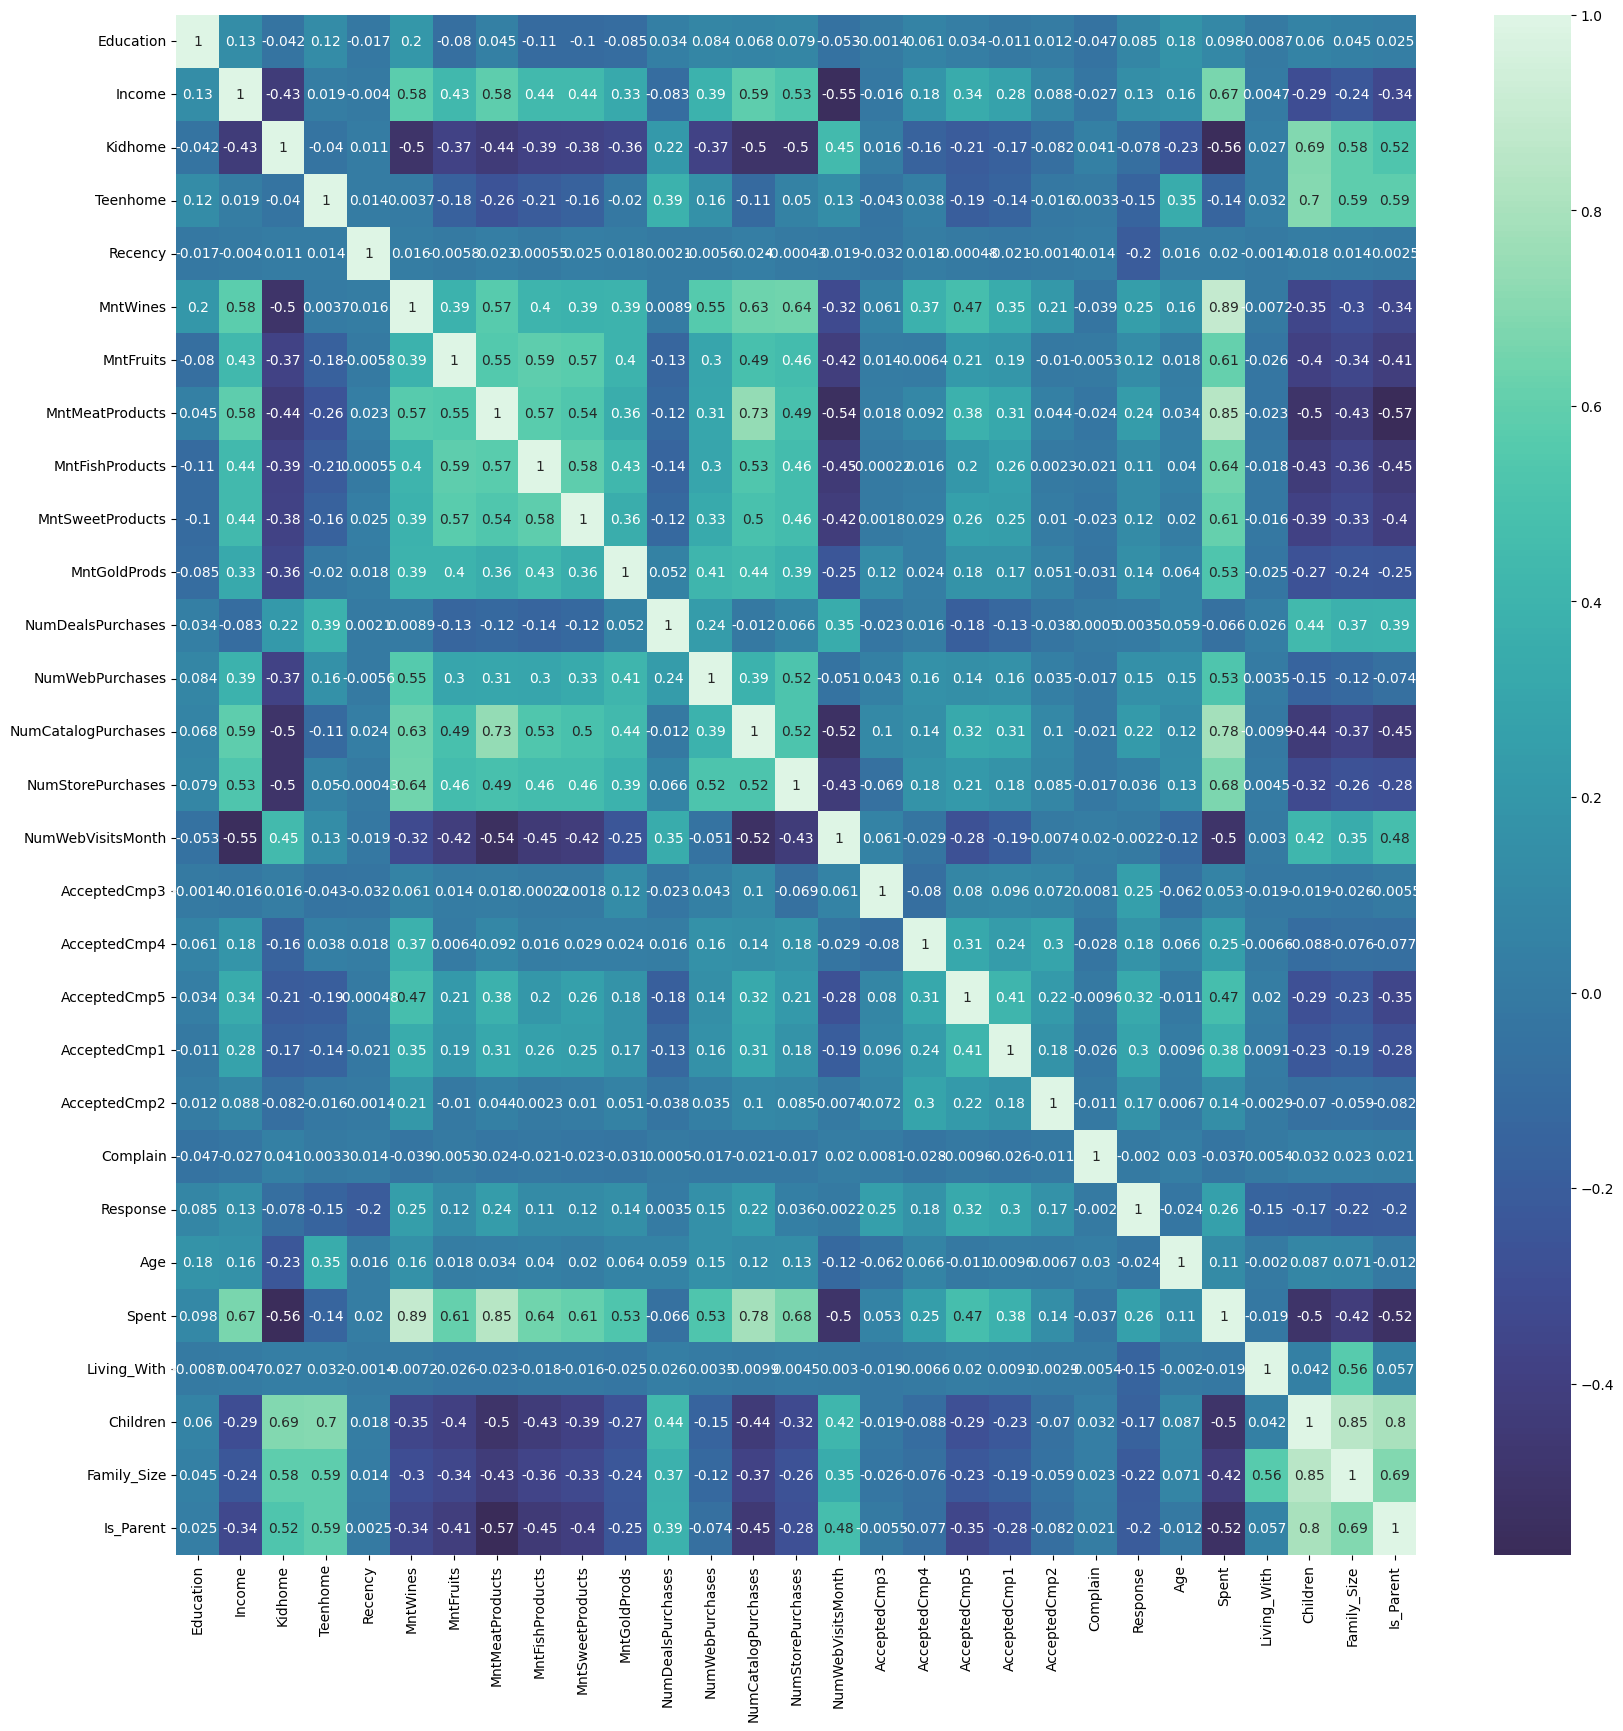

In [36]:
corrmat = data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

## Feature_Scaling


In this section, numerical features are scaled.

StandardScaler = $\frac{x-\mu}{s}$

In [37]:
data_old = data.copy()

In [38]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [39]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [40]:
data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.409776,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0.986443,1.675488,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.409776,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,1.236801,-0.962358,-1.348829,1.405806,0.450009,0.632356
2,-0.409776,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.318822,0.280250,0.741384,-1.264803,-0.654332,-1.581389


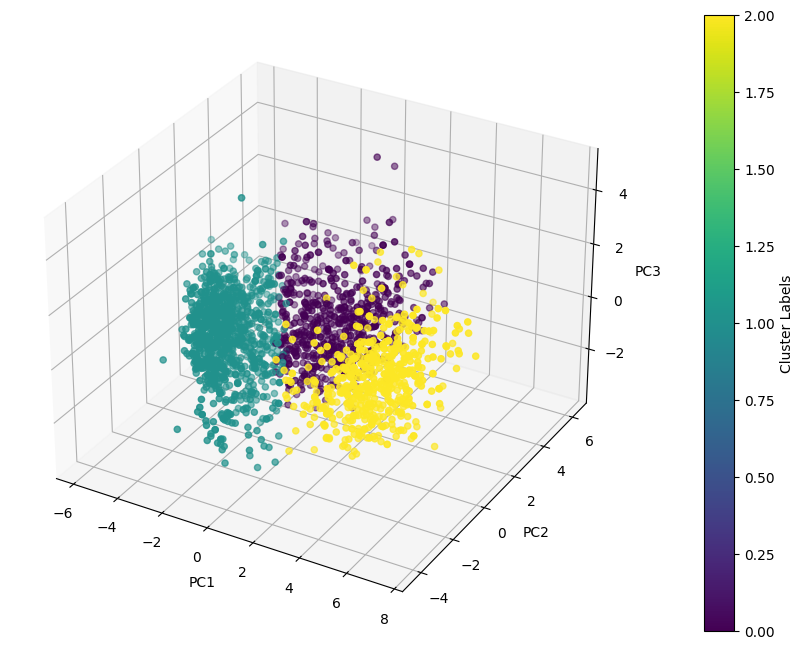

In [41]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters using PCA with 3 dimensions
pca_3d = PCA(n_components=3)
pca_3d.fit(data)
data_pca_3d = pca_3d.transform(data)

# Plot the data points in the 3D PCA space, colored by their cluster labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=labels, cmap='viridis')

# Set labels for each axis
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a colorbar to the right of the plot
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, fraction=0.05)
colorbar.set_label('Cluster Labels')

# Display the 3D plot
plt.show()



## Dimensionality_Reduction

**High-Dimensional Data:**
The dataset appears to contain several features, possibly representing different aspects of customer behavior and demographics.

**Dimensionality Reduction:**

PCA is employed to reduce the dimensionality of the dataset while preserving its variance.
Visualization in a 3D space allows for a simplified representation of the data, facilitating easier interpretation and potential identification of patterns or clusters.
**Clustering Purpose:**
The use of PCA before clustering helps in reducing the computational complexity and enhances the interpretability of the results. The 3D visualization allows for a more insightful exploration of potential clusters within the data.

In [42]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [43]:
W = p.components_.T
W

array([[ 0.01040876,  0.1383516 , -0.49500974],
       [ 0.24306411,  0.16645851, -0.06477138],
       [-0.24865984,  0.00209911,  0.29016793],
       [-0.1036212 ,  0.45979365, -0.15932673],
       [ 0.00302918,  0.01528545,  0.03783711],
       [ 0.2566197 ,  0.21456817, -0.1217309 ],
       [ 0.24129063,  0.01740334,  0.250064  ],
       [ 0.28779117,  0.01479723,  0.07992574],
       [ 0.25160233,  0.00612295,  0.25579708],
       [ 0.23968111,  0.02717075,  0.25772554],
       [ 0.19072251,  0.12985497,  0.18318009],
       [-0.08020431,  0.35299386,  0.13058274],
       [ 0.16767833,  0.30319763,  0.00747245],
       [ 0.27910652,  0.11115253,  0.016451  ],
       [ 0.24203237,  0.2108607 , -0.01318313],
       [-0.22690586,  0.04633287,  0.07707047],
       [ 0.03668678,  0.22497551, -0.42786778],
       [ 0.322136  ,  0.14027331,  0.03465927],
       [-0.02791589,  0.12707646,  0.32674059],
       [-0.25350807,  0.33553711,  0.09223198],
       [-0.2244086 ,  0.34463973,  0.248

In [44]:
pd.DataFrame(W, index=data.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Education,0.010409,0.138352,-0.495010
Income,0.243064,0.166459,-0.064771
Kidhome,-0.248660,0.002099,0.290168
Teenhome,-0.103621,0.459794,-0.159327
Recency,0.003029,0.015285,0.037837
MntWines,0.256620,0.214568,-0.121731
MntFruits,0.241291,0.017403,0.250064
MntMeatProducts,0.287791,0.014797,0.079926
MntFishProducts,0.251602,0.006123,0.255797
MntSweetProducts,0.239681,0.027171,0.257726


In [45]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))

In [46]:
data_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-1.539082e-16,2.847881,-5.818380,-2.494432,-0.777550,2.378863,7.376779
col2,2216.0,6.412841e-17,1.699979,-4.352612,-1.336450,-0.130531,1.223228,6.222670
col3,2216.0,6.412841e-18,1.192222,-3.501001,-0.855428,-0.009711,0.835561,4.890285


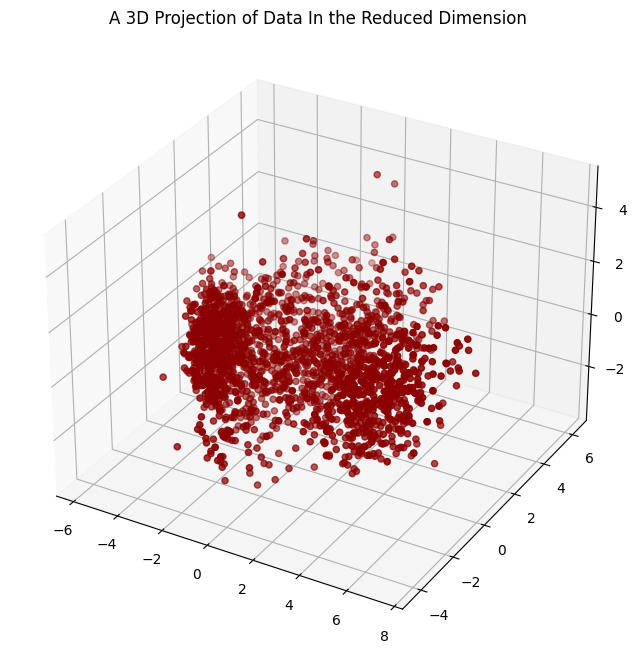

In [47]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

## Clustering



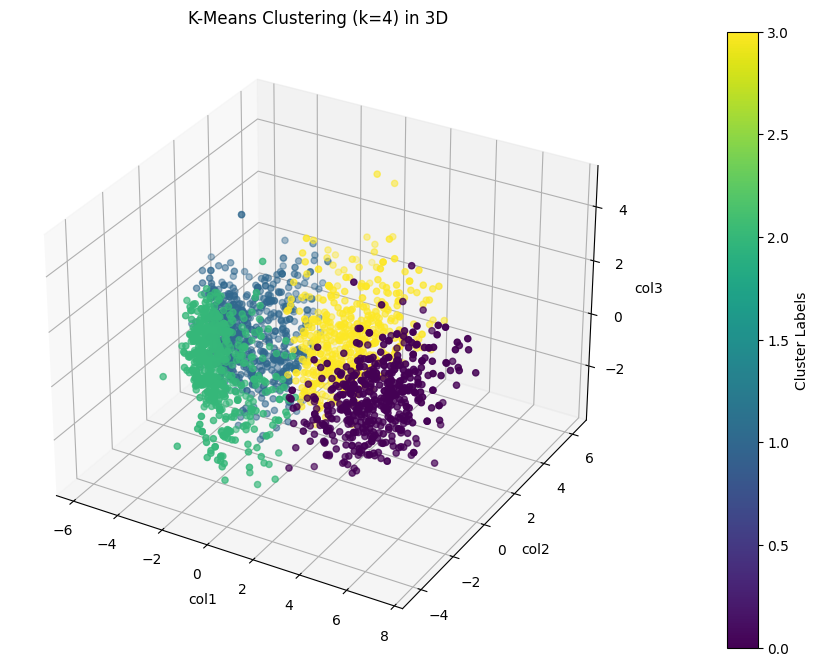

In [48]:
# Apply KMeans clustering with k=4 on data_PCA
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_PCA)
labels = kmeans.labels_
data_PCA['cluster'] = labels
data_PCA.head(3)

# Visualizing the clusters in 3D
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_PCA['col1'], data_PCA['col2'], data_PCA['col3'], c=data_PCA['cluster'], cmap='viridis')

# Set labels for each axis
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')

# Add a colorbar to the right of the plot
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, fraction=0.05)
colorbar.set_label('Cluster Labels')

# Set title for the plot
ax.set_title('K-Means Clustering (k=4) in 3D')

# Display the 3D plot
plt.show()



## Clusters_Analysis_and_Customers_Profiling



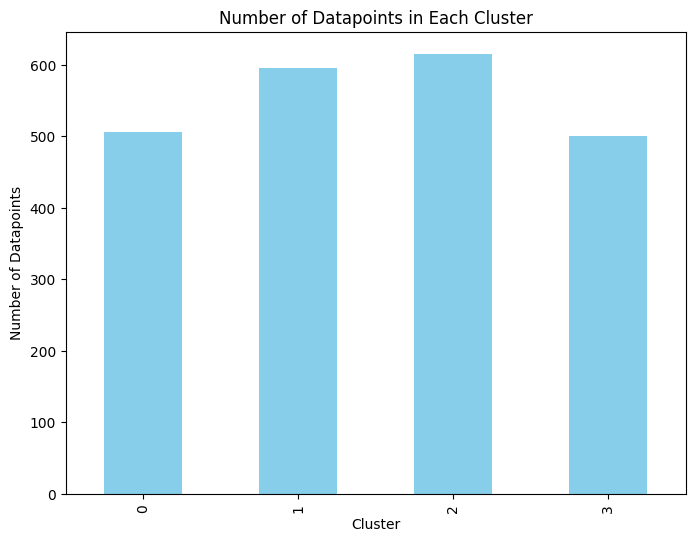

In [49]:
# Get the count of datapoints in each cluster
cluster_counts = data_PCA['cluster'].value_counts()

# Plot a bar plot indicating the number of datapoints in each cluster
plt.figure(figsize=(8, 6))
cluster_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Datapoints')
plt.title('Number of Datapoints in Each Cluster')
plt.show()



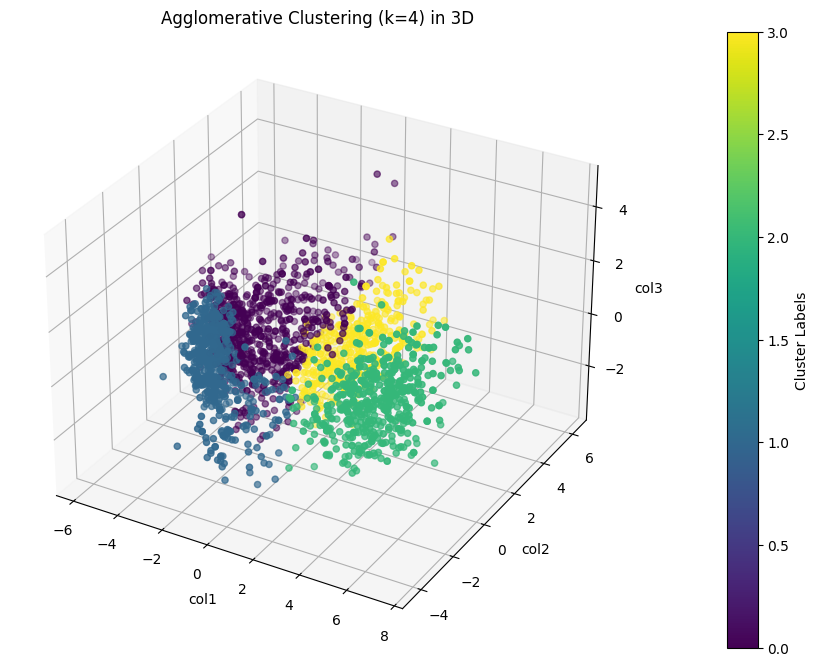

In [51]:
# Doing the same clustering with AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=4)
agg_model.fit(data_PCA)
agg_labels = agg_model.labels_
data_PCA['cluster_agg'] = agg_labels
data_PCA.head(3)
# Visualizing the clusters in 3D
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_PCA['col1'], data_PCA['col2'], data_PCA['col3'], c=data_PCA['cluster_agg'], cmap='viridis')

# Set labels for each axis
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')

# Add a colorbar to the right of the plot
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, fraction=0.05)
colorbar.set_label('Cluster Labels')

# Set title for the plot
ax.set_title('Agglomerative Clustering (k=4) in 3D')

# Display the 3D plot
plt.show()


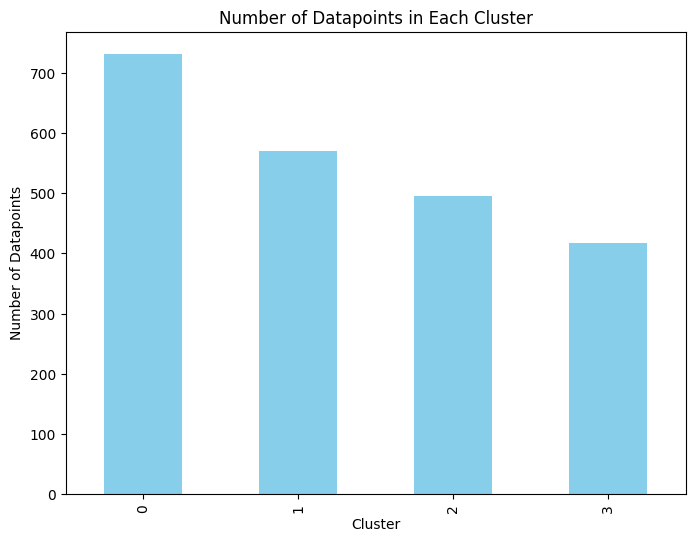

In [52]:

agg_cluster_counts = data_PCA['cluster_agg'].value_counts()
plt.figure(figsize=(8, 6))
agg_cluster_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Datapoints')
plt.title('Number of Datapoints in Each Cluster')
plt.show()
